In [1]:

import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


!pip install opencv-python

In [2]:
obj = cv2.imread('spades.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('symbols.png', cv2.IMREAD_GRAYSCALE)

In [3]:
if src is None or obj is None:
    print('Image load failed!')
    sys.exit()

흰색으로 객체를 받아야 하므로 반전해서 받아줍니다.

In [18]:
_, obj_bin = cv2.threshold(obj, 128, 255, cv2.THRESH_BINARY_INV)
print(obj_bin)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


객체의 외곽선 좌표를 모두 찾아내는것이 우선입니다.
외곽선 좌표의 shape은 (K,1,2)로 구성되며 K는 실제 외곽선 점들의 개수, 1은 더미이고, 2는 x,y 좌표가 되겠습니다. 이때 dataType는 일반적인 정수형 4Type을 사용합니다

In [34]:
obj_contours, _ = cv2.findContours(obj_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(obj_contours)
print(len(obj_contours))

[array([[[258,  48]],

       [[257,  49]],

       [[256,  50]],

       ...,

       [[260,  50]],

       [[260,  49]],

       [[259,  48]]], dtype=int32)]
1


외곽선 검출정보를 obj_pts에 저장합니다. obj_contours[0] 자체가 K이며, K는 좌표값ㅂ을 가지고 있는 리스트입니다.

In [29]:
obj_pts = obj_contours[0]
print(obj_pts)

[[[258  48]]

 [[257  49]]

 [[256  50]]

 ...

 [[260  50]]

 [[260  49]]

 [[259  48]]]


((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x2191626abb0>)

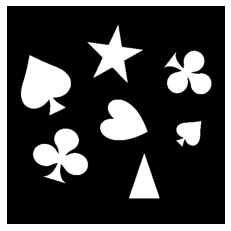

In [31]:
_, src_bin = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY_INV)
plt.axis('off'),plt.imshow(src_bin,cmap='gray')

검출된 모든 객체를 contours에 저장해 줍니다.

In [32]:
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(contours)

[array([[[322, 346]],

       [[322, 347]],

       [[321, 348]],

       [[321, 349]],

       [[321, 350]],

       [[320, 351]],

       [[320, 352]],

       [[320, 353]],

       [[319, 354]],

       [[319, 355]],

       [[319, 356]],

       [[318, 357]],

       [[318, 358]],

       [[318, 359]],

       [[317, 360]],

       [[317, 361]],

       [[317, 362]],

       [[316, 363]],

       [[316, 364]],

       [[316, 365]],

       [[315, 366]],

       [[315, 367]],

       [[315, 368]],

       [[314, 369]],

       [[314, 370]],

       [[313, 371]],

       [[313, 372]],

       [[313, 373]],

       [[312, 374]],

       [[312, 375]],

       [[312, 376]],

       [[311, 377]],

       [[311, 378]],

       [[311, 379]],

       [[310, 380]],

       [[310, 381]],

       [[310, 382]],

       [[309, 383]],

       [[309, 384]],

       [[309, 385]],

       [[308, 386]],

       [[308, 387]],

       [[308, 388]],

       [[307, 389]],

       [[307, 390]],

       [[

In [10]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

7


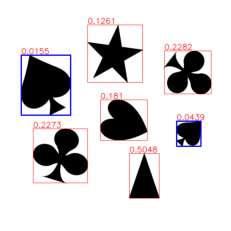

In [33]:
plt.axis('off'),plt.imshow(dst)
print(len(contours))

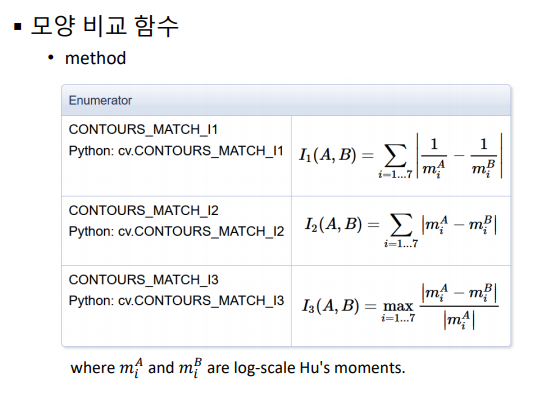

In [14]:
for pts in contours:
    if cv2.contourArea(pts) < 1000:
        continue
    rc = cv2.boundingRect(pts)
    cv2.rectangle(dst, rc, (255, 0, 0), 1)
    
    #모양비교 : 매치3로 비교해 distance를 리턴해줍니다. 
    dist = cv2.matchShapes(obj_pts, pts, cv2.CONTOURS_MATCH_I3, 0)
    cv2.putText(dst, str(round(dist, 4)), (rc[0], rc[1] - 3),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1, cv2.LINE_AA)
    if dist < 0.1:
        cv2.rectangle(dst, rc, (0, 0, 255), 2)

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x219161c1b20>)

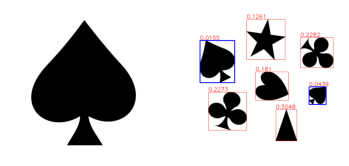

In [17]:
plt.subplot(121),plt.axis('off'),plt.imshow(obj,cmap='gray')
plt.subplot(122),plt.axis('off'),plt.imshow(dst)

In [35]:
cv2.imshow('obj', obj)
cv2.imshow('dst', dst)
cv2.waitKey(0)

-1